## Cel 
Celem wyzwania jest wykorzystanie uczenia nienadzorowanego do wykonania segmentacji klientów

Wczytuje Pakiety

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

In [150]:
dane = pd.read_csv('Customers.csv', sep=';',decimal =',')
dane

,CustomerId,Profit,Recency,Frequency,Monetary,Variance
0,1,187,63,1,2349.06,2
1,2,96,10,6,922.62,4
2,3,47,35,4,881.22,3
3,4,294,5,1,3815.16,2
4,5,732,4,31,41868.11,29
...,...,...,...,...,...,...
1506,1507,174,18,3,15798.92,17
1507,1508,124,28,12,2676.89,7
1508,1509,1543,4,17,109497.54,54
1509,1510,668,1,3,49602.45,17


W pliku customers.csv mamy 6 kolumn: 
- CustomerID - unikalny identyfikator klienta
- Profit - jaką profitowość przynosi klient, wartość bez jednostki, im wyższa wartość tym lepiej
- Recency - ile dni temu było ostatnie zamówienie klienta, ilość w dniach, im niższa wartość tym lepiej
- Frequency	 - jak często klient zamawiał produkty, wartość bez jednostki, im wyższa wartość tym lepiej
- Monetary	- całkowita wartość zamówionych produktów przez klienta, jednostka PLN, im wyższa wartość tym lepiej
- Variance - ilość różnorodnych produktów, które zostały zamówione przez klienta, wartość bez jednostki, im wyższa wartość tym lepiej


<AxesSubplot:>

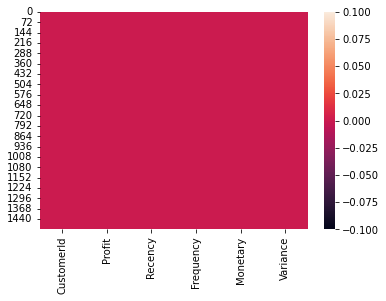

In [3]:
sns.heatmap(dane.isna())

<AxesSubplot:>

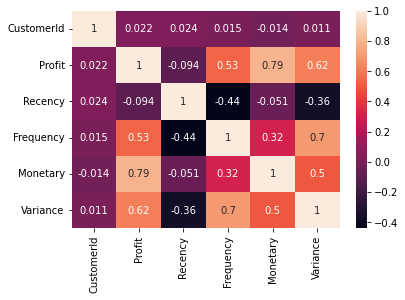

In [132]:
sns.heatmap(dane.corr(), annot=True)

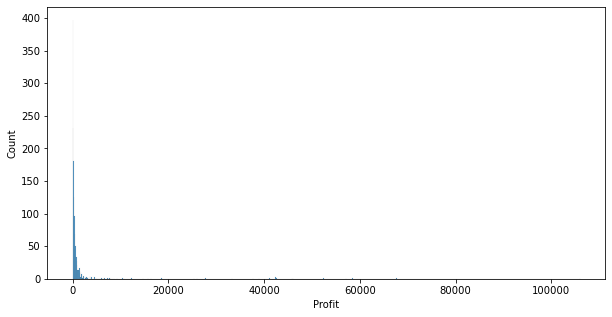

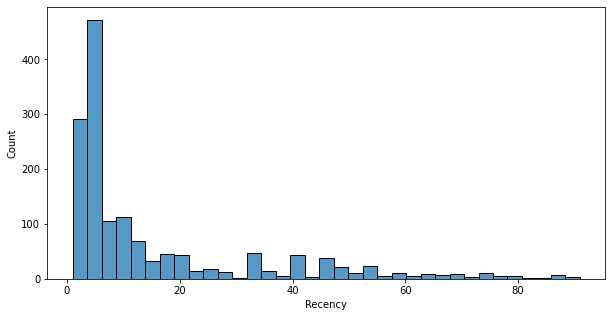

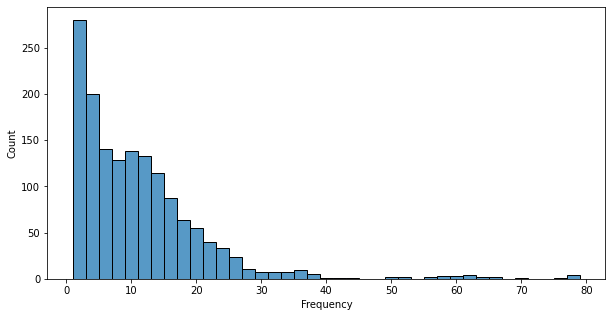

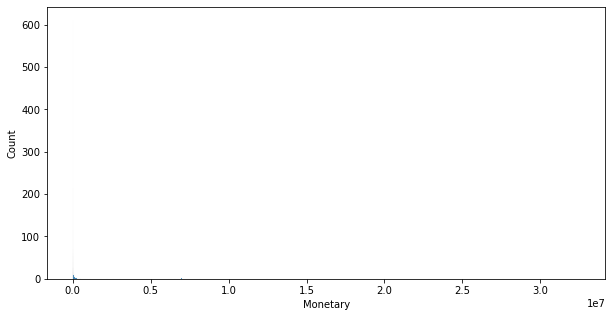

In [139]:
for a in range(1,5):
    plt.figure(figsize=(10,5))
    sns.histplot(dane.iloc[:,a])

In [135]:
dane.iloc[:,2]

0       63
1       10
2       35
3        5
4        4
        ..
1506    18
1507    28
1508     4
1509     1
1510    35
Name: Recency, Length: 1511, dtype: int64

In [147]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

danescal = scale.fit_transform(dane.iloc[:,1])

print(danescal)

NameError: name 'scaler' is not defined

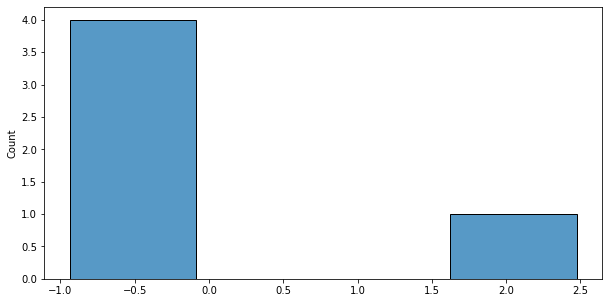

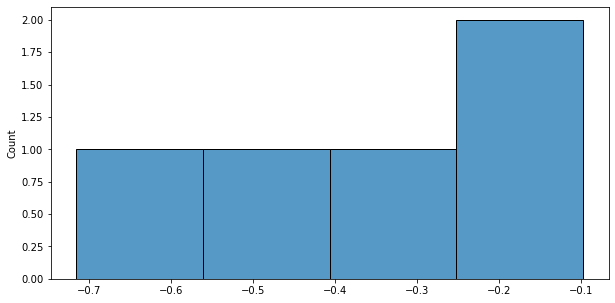

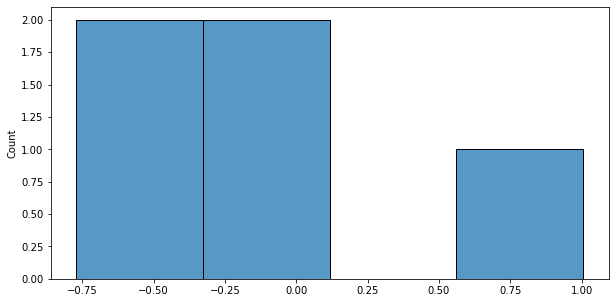

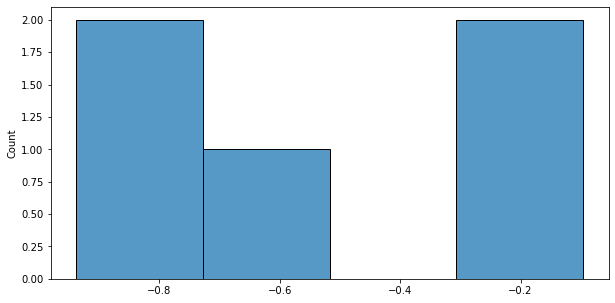

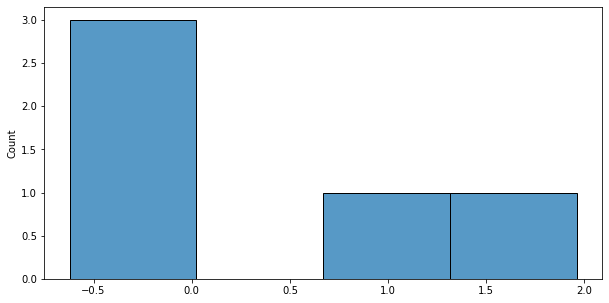

In [146]:
for a in range(0,5):
    plt.figure(figsize=(10,5))
    sns.histplot(danescal[a],)

In [148]:
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(dane.iloc[:,1])

NameError: name 'MinMaxScaler' is not defined

In [153]:
from sklearn import preprocessing

d = preprocessing.normalize(dane.iloc[:,1:])
scaled_df = pd.DataFrame(d, columns=dane.iloc[:,1:].columns)
scaled_df.head()



,Profit,Recency,Frequency,Monetary,Variance
0,0.079327,0.026725,0.000424,0.996490,0.000848
1,0.103484,0.010780,0.006468,0.994542,0.004312
2,0.053217,0.039630,0.004529,0.997780,0.003397
3,0.076833,0.001307,0.000261,0.997043,0.000523
4,0.017481,0.000096,0.000740,0.999847,0.000693


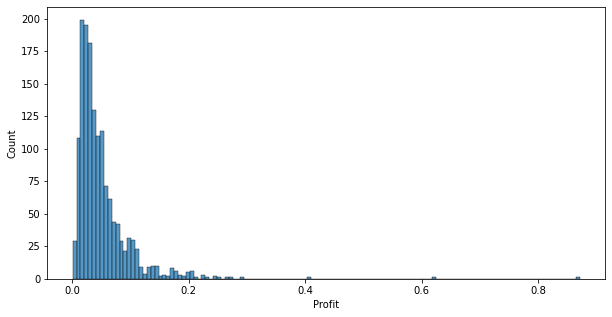

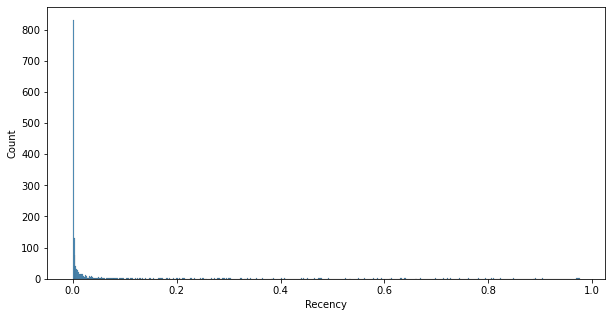

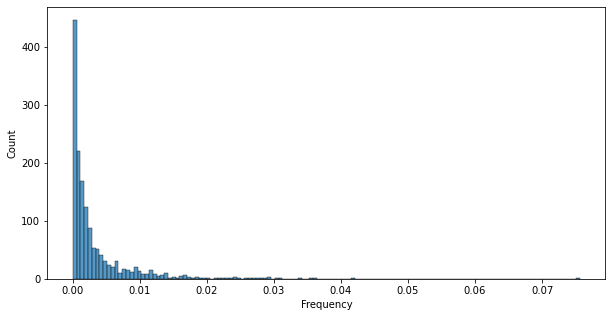

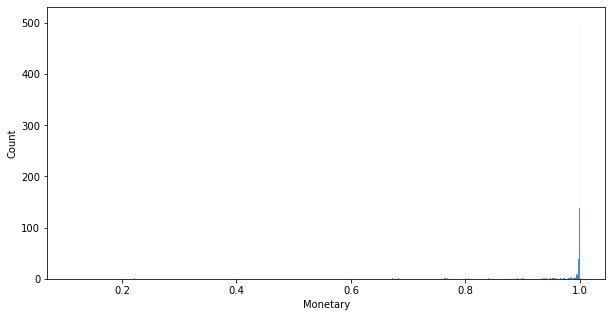

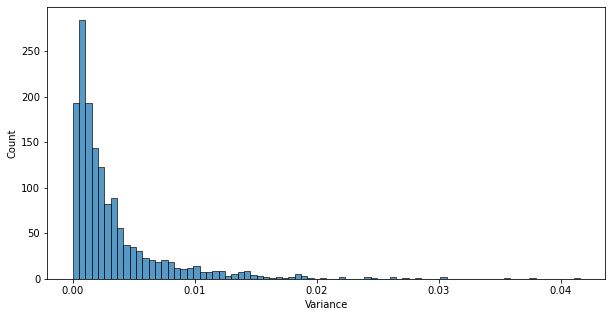

In [156]:
for a in range(0,5):
    plt.figure(figsize=(10,5))
    sns.histplot(scaled_df.iloc[:,a])

Widzimy, zmienne są ze sobą skorelowane. 